## 1. Install the twitter library in python

In [1]:
# > !pip install tweepy

## 2. Install library for JSON

In [2]:
# > !pip install simplejson

## 3. Install sentiment analysis library

In [3]:
# Whatever library you use
# > !pip install textblob
# > !python -m textblob.download_corpora lite

# Streaming tweets and perform some data analysis


### Setting up and running a streaming crawler

In [ ]:
import tweepy
import simplejson as json
from tweepy import OAuthHandler
from tweepy import Stream
from tweepy.streaming import StreamListener
 
#Complete with your keys 
consumer_key = '6MuF4e4cSeDBqYHH2S9aLsbG3'
consumer_secret = '9bTyuSMWCHgKUF73T3IeWSKCOUkUPqC8Hh0xK8r7gI02q3ZWKM'
access_token = '198141183-bfJWLbps5saQVlIUypSVqq25zQ8FGa1lZIeChPXt'
access_secret = 'kwTuELCW2J3odpiVco8mCahwXFGKasY0uuzMZO7X7vTTF'
 
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
 

class MyListener(StreamListener):
    
    def __init__(self, api=None):
        super(StreamListener, self).__init__()
        self.num_tweets = 0

    def on_data(self, data):
        
        try:
            with open('other.json', 'w') as f:
                # Checks that the language of the tweet is English and, if so, save it.
                if json.loads(data)['lang'] == 'en':
                    f.write(data) # This will store the whole JSON data in the file, you can perform some JSON filters
                    twitter_text = json.loads(data)['text'] # You can also print your tweets here
                    self.num_tweets += 1

                    # Just to limit the number of tweets collected to check the 
                    # program at the beginning, then increase the limit
                if self.num_tweets < 10000: 
                    return True
                else:
                    return False
        except BaseException as e:
            print("Error on_data: %s" % str(e))
        return True

 
    def on_error(self, status):
        print('Error :', status.place)
        return False
    
twitter_stream = Stream(auth, MyListener())
twitter_stream.filter(track=["davos"]) # Add your keywords and other filters

print('_______ End _______')

In [159]:
import tweepy
import simplejson as json
from tweepy import OAuthHandler
from tweepy import Stream
from tweepy.streaming import StreamListener
import datetime
import time
 
#Complete with your keys 
consumer_key = '6MuF4e4cSeDBqYHH2S9aLsbG3'
consumer_secret = '9bTyuSMWCHgKUF73T3IeWSKCOUkUPqC8Hh0xK8r7gI02q3ZWKM'
access_token = '198141183-bfJWLbps5saQVlIUypSVqq25zQ8FGa1lZIeChPXt'
access_secret = 'kwTuELCW2J3odpiVco8mCahwXFGKasY0uuzMZO7X7vTTF'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
# ---------------------------------------------- #
api = tweepy.API(auth)
# ---------------------------------------------- #
#username = sys.argv[1]
startDate = datetime.datetime(2020, 1, 19, 0, 0, 0)
endDate =   datetime.datetime(2020, 1, 23, 0, 0, 0)
# ---------------------------------------------- #
tweets = []
#tmpTweets = api.search("davos", lan="en", until="2020-01-21", count=10000)
'''for tweet in tmpTweets:
    if tweet.created_at < endDate and tweet.created_at > startDate:
        tweets.append(tweet)'''
        
searched_tweets2 = []

cursor = tweepy.Cursor(api.search, "davos", lang="en", until="2020-01-20").items(5000)

while True:
    try:
        tweet = cursor.next()
        searched_tweets2.append(tweet)
    except tweepy.TweepError:
        print('Waiting', len(searched_tweets2))
        time.sleep(60 * 15)
        continue
    except StopIteration:
        break

Waiting 0
Waiting 2698


In [160]:
str_tweets1 = [json.dumps(elem._json) for elem in searched_tweets2]

In [161]:
with open('davos2.json', 'w') as f:
    for tweet in str_tweets1:
        f.write(tweet)
        f.write('\n')

### Store the JSON data in a CSV for analysing

In [162]:
import simplejson as json

# Create the CSV file
with open ("davos2.csv", 'w', encoding ='utf-8') as csv:
    # Write the title of the columns (features) that you want to store in the CSV file
    csv.write('tweet_id,source,user_location,user_id,verified,followers,friends,is_quotation,is_reply,rt_cnt,fav_cnt,text\n') 
    # Copy the data from the JSON file
    with open('davos2.json', 'r', encoding ='utf-8') as jsonfile:
        for tweet in jsonfile: 
            data = json.loads(tweet)
            if data['lang'] != 'en':
                continue
            tweet_id = str(data['id'])
            source = str(data['source'])
            delim_init = source.index(">")+1
            delim_end = source.index("<", delim_init)
            source = source[delim_init:delim_end]
            if data['user']['location']:
                user_location = data['user']['location'].replace('\n', '').replace(",", "")
            else:
                user_location = 'empty'
            user_id = str(data['user']['id'])
            verified = str(data['user']['verified'])
            followers = str(data['user']['followers_count'])
            friends = str(data['user']['friends_count'])
            # Quotation says if tweet is a quotation of another tweet or not
            try:
                if data['quoted_status_id']:
                    is_quotation = str(1)
            except KeyError:
                is_quotation = str(0)
            # Whether the tweet is a reply to another or not
            if data['in_reply_to_status_id']:
                is_reply = str(1)
            else:
                is_reply = str(0)
            retweet_count = str(data['retweet_count'])
            reply_count = "none"#str(0)
            favorite_count = str(data['favorite_count'])

            text = str(data['text'].replace('\n', '').replace(",", ""))
            
            line = ",".join([tweet_id,source,user_location,user_id,verified,followers,friends,is_quotation,is_reply,retweet_count,favorite_count,text])+'\n'
            csv.write(line)

In [1]:
import string, re, nltk

In [2]:
punctuation = string.punctuation.replace("#", "").replace("@", "")

In [3]:
def remove_punctuation(text):
    text = "".join([char for char in text if char not in punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

In [4]:
def tokenization (text):
    text = re.split(' ', text)
    return text

In [5]:
def remove_stopwords(text):
    stopwords = nltk.corpus.stopwords.words('english')
    other = ['rt', 'yr', 'year', 'old', 'http', 'https', 'davos']
    stopwords.extend(other)
    text = [word for word in text if not (word.startswith("@") or word.startswith("#"))]
    text = [word for word in text if word not in stopwords]
    return " ".join(text)

### Load the previous CSV into pandas

In [9]:
import pandas as pd
from textblob import TextBlob
tweets1 = pd.read_csv('davos2.csv', index_col=0, encoding='utf-8', delimiter=',')
tweets2 = pd.read_csv('davos3.csv', index_col=0, encoding='utf-8', delimiter=',')
tweets = pd.concat([tweets1, tweets2])
tweets['text_punct'] = tweets['text'].apply(lambda x: remove_punctuation(x))
tweets['text_token'] = tweets['text_punct'].apply(lambda x: tokenization(x.lower()))
tweets['text_clean'] = tweets['text_token'].apply(lambda x: remove_stopwords(x))
tweets['popularity'] = tweets['rt_cnt'] + tweets['fav_cnt']
tweets['text_polarity'] =  tweets['text_punct'].apply(lambda x: TextBlob(x).sentiment.polarity)
tweets['text_subjectivity'] =  tweets['text_punct'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
tweets.head(10)

,source,user_location,user_id,verified,followers,friends,is_quotation,is_reply,rt_cnt,fav_cnt,text,text_punct,text_token,text_clean,popularity,text_polarity,text_subjectivity
tweet_id,,,,,,,,,,,,,,,,,
1219046880933502976,Twitter for Android,stuffistan,2412715069,False,66,1521,0,0,7,0,RT @adam_tooze: Trade war on? Trade war off? W...,RT @adamtooze Trade war on Trade war off What ...,"[rt, @adamtooze, trade, war, on, trade, war, o...",trade war trade war make trump tantrums piece ...,7,0.000000,0.000000
1219046869352865793,Twitter for Android,Vancouver BC canada,1062311268122411013,False,96,443,0,0,89,0,RT @AminaJMohammed: What color is your climate...,RT @AminaJMohammed What color is your climate ...,"[rt, @aminajmohammed, what, color, is, your, c...",color climate leadership it’s time go green b...,89,0.016667,0.383333
1219046851661455360,Twitter for iPhone,empty,246993396,False,2779,2234,0,0,4,0,RT @CaracasChron: On Sunday it’s been confirme...,RT @CaracasChron On Sunday it’s been confirmed...,"[rt, @caracaschron, on, sunday, it’s, been, co...",sunday it’s confirmed traveled colombia start ...,4,0.200000,0.500000
1219046847127412738,Twitter for iPhone,Galway * Oslo * Worldwide,225797064,False,2007,5001,0,0,12,0,RT @CEPIvaccines: “Infectious disease is a rem...,RT @CEPIvaccines “Infectious disease is a remi...,"[rt, @cepivaccines, “infectious, disease, is, ...",“infectious disease reminder interconnected st...,12,0.000000,0.000000
1219046778986692616,Twitter Web App,Madrid España,733824560,False,6374,5527,0,0,166,0,RT @PattyLaya: Guaido plans to attend the Worl...,RT @PattyLaya Guaido plans to attend the World...,"[rt, @pattylaya, guaido, plans, to, attend, th...",guaido plans attend world economic forum inter...,166,0.100000,0.150000
1219046753799942144,Twitter Web App,Tampere,71367033,False,247,1078,0,0,0,9,We have a great Prime Minister 🎉! #sannamari...,We have a great Prime Minister 🎉 #sannamarin...,"[we, have, a, great, prime, minister, 🎉, , , #...",great prime minister 🎉 finland’s sanna marin...,9,0.400000,0.458333
1219046749173452800,Twitter for Android,PNW / NYC,1054959943445594113,False,38,258,0,0,206,0,"RT @IPBES: ""We all rely on nature and we all t...",RT @IPBES We all rely on nature and we all tak...,"[rt, @ipbes, we, all, rely, on, nature, and, w...",rely nature take grantedahead new report produ...,206,0.136364,0.454545
1219046744836755456,Twitter Web App,Havertown Pa,832267802090291200,False,93,1333,0,0,199,0,RT @agearan: Trump will rub shoulders w/ world...,RT @agearan Trump will rub shoulders w world l...,"[rt, @agearan, trump, will, rub, shoulders, w,...",trump rub shoulders w world leaders major euro...,199,-0.084375,0.300000
1219046736863420416,Twitter for iPhone,Cambridge Mass.,36623,True,39487,2936,0,0,13,0,RT @zseward: Just a quarter of Davos delegates...,RT @zseward Just a quarter of Davos delegates ...,"[rt, @zseward, just, a, quarter, of, davos, de...",quarter delegates women yet two white dudes na...,13,0.000000,0.000000


### Analysing the polarity of the tweets

In [10]:
avg_polarity = tweets['text_polarity'].mean()
avg_subjectivity = tweets['text_subjectivity'].mean()
avg_polarity, avg_subjectivity

(0.0908217847654304, 0.26446051022370803)

In [11]:
s = ' '.join(tweets['text_clean'].to_list())

### Generating a wordcloud

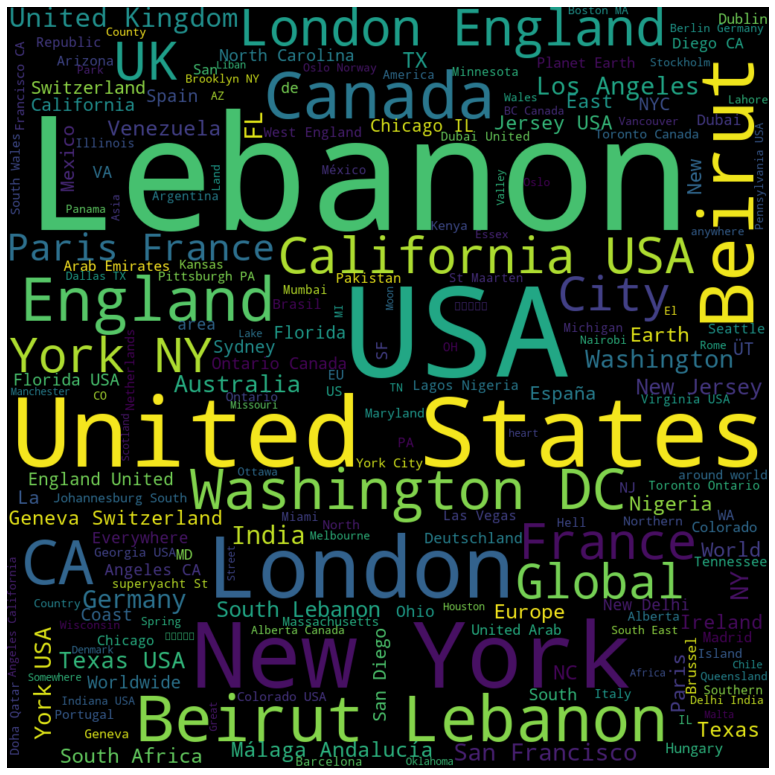

In [30]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
 
# Create a list of word
text = s
# Create the wordcloud object
wordcloud = WordCloud(width=1024, height=1024, margin=0).generate(text)
 
# Display the generated image:
plt.figure(figsize=(14, 14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

## Your own analysis

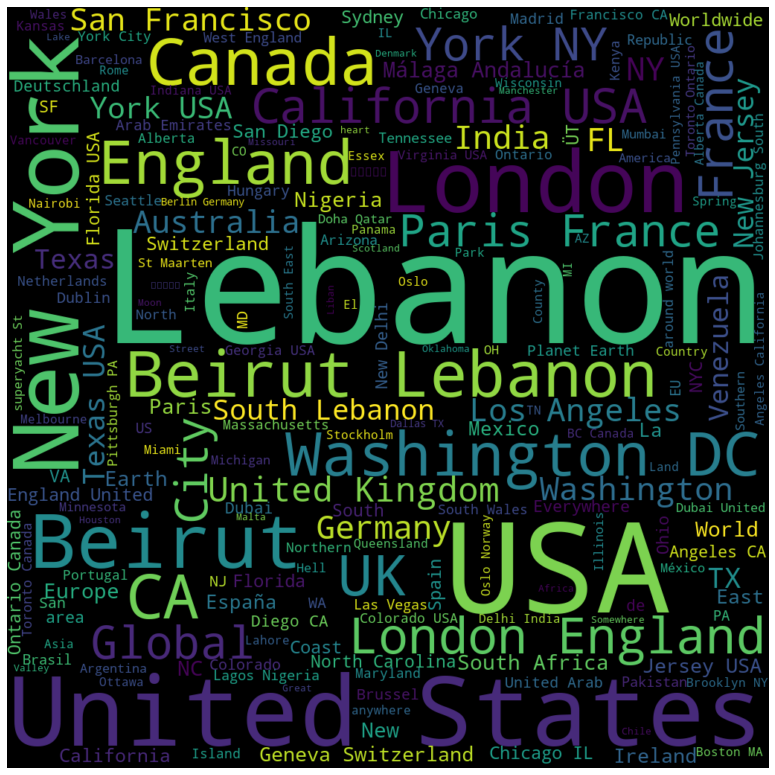

In [13]:
s = ' '.join([elem for elem in tweets['user_location'].to_list() if elem != 'empty'])
text = s
# Create the wordcloud object
wordcloud = WordCloud(width=1024, height=1024, margin=0).generate(text)
 
# Display the generated image:
plt.figure(figsize=(14, 14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [14]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

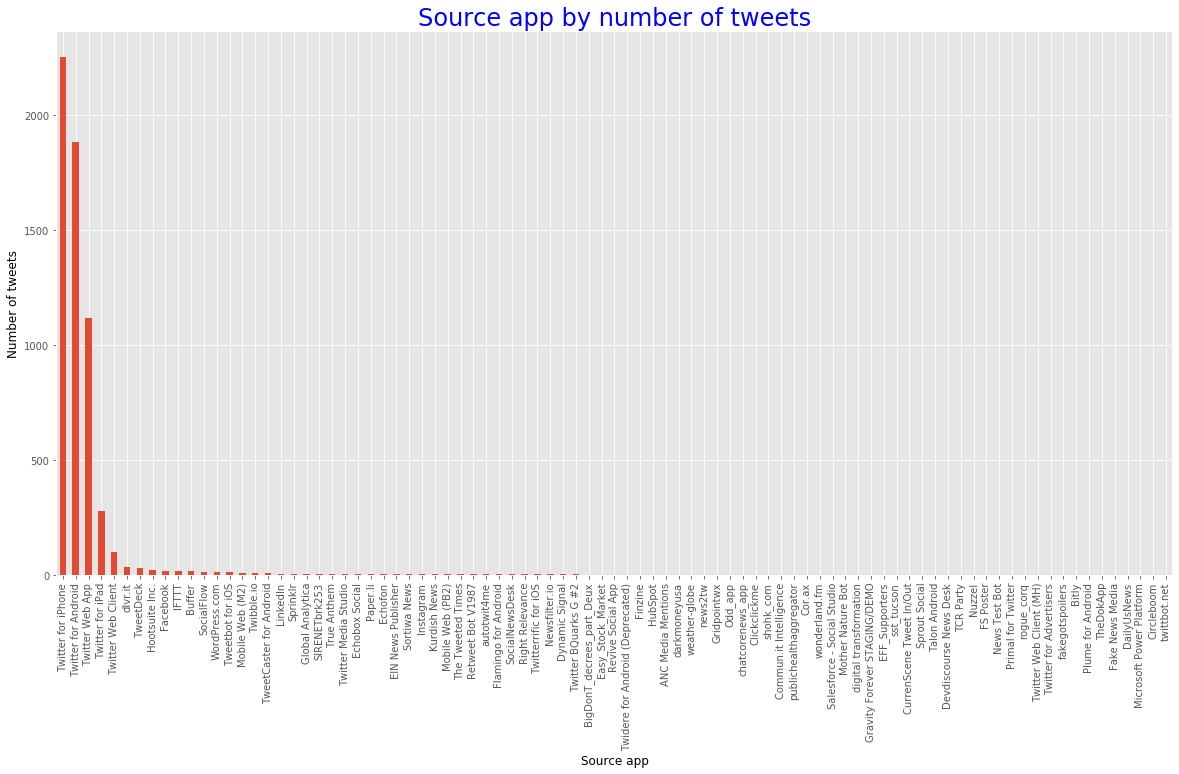

In [15]:
import warnings
warnings.filterwarnings("ignore")
fig, ax = plt.subplots(figsize=(20,10))
tweets['source'].value_counts().plot(ax=ax, kind='bar')
plt.ylabel("Number of tweets", color='black')
plt.xlabel("Source app", color='black')
plt.title('Source app by number of tweets', color='blue', fontsize=24)
plt.show()

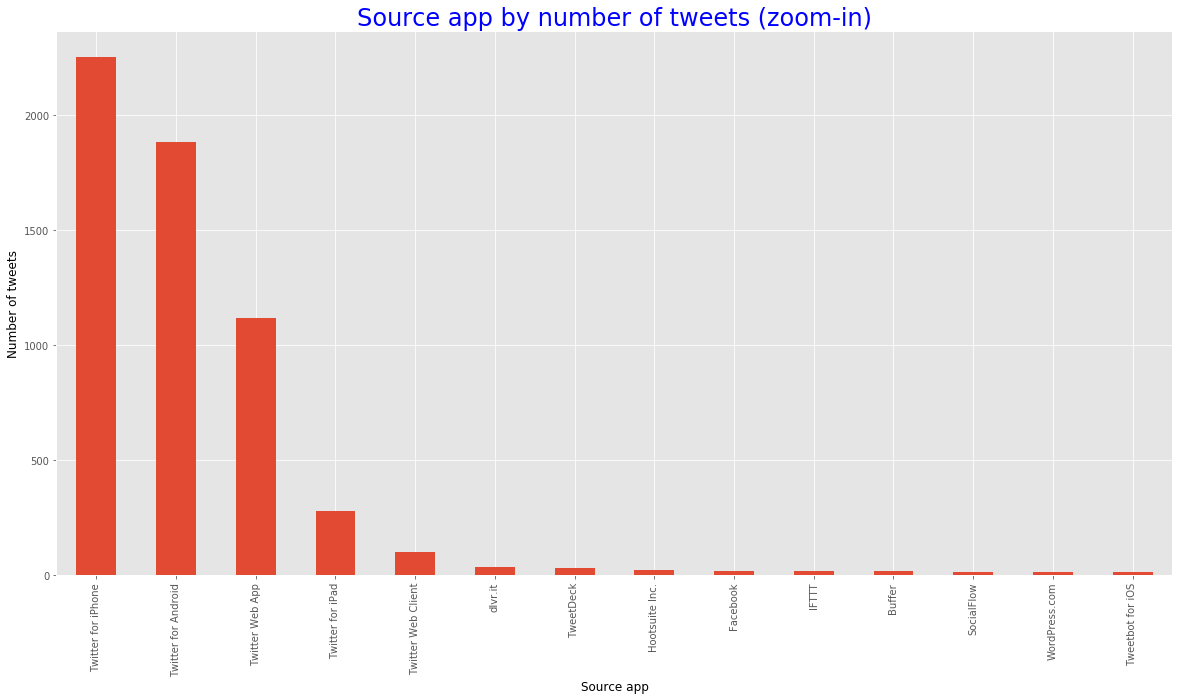

In [17]:
fig, ax = plt.subplots(figsize=(20,10))
tweets['source'].value_counts()[tweets['source'].value_counts() > 10].plot(ax=ax, kind='bar')
plt.ylabel("Number of tweets", color='black')
plt.xlabel("Source app", color='black')
plt.title('Source app by number of tweets (zoom-in)', color='blue', fontsize=24)
plt.show()

## Histograms followers

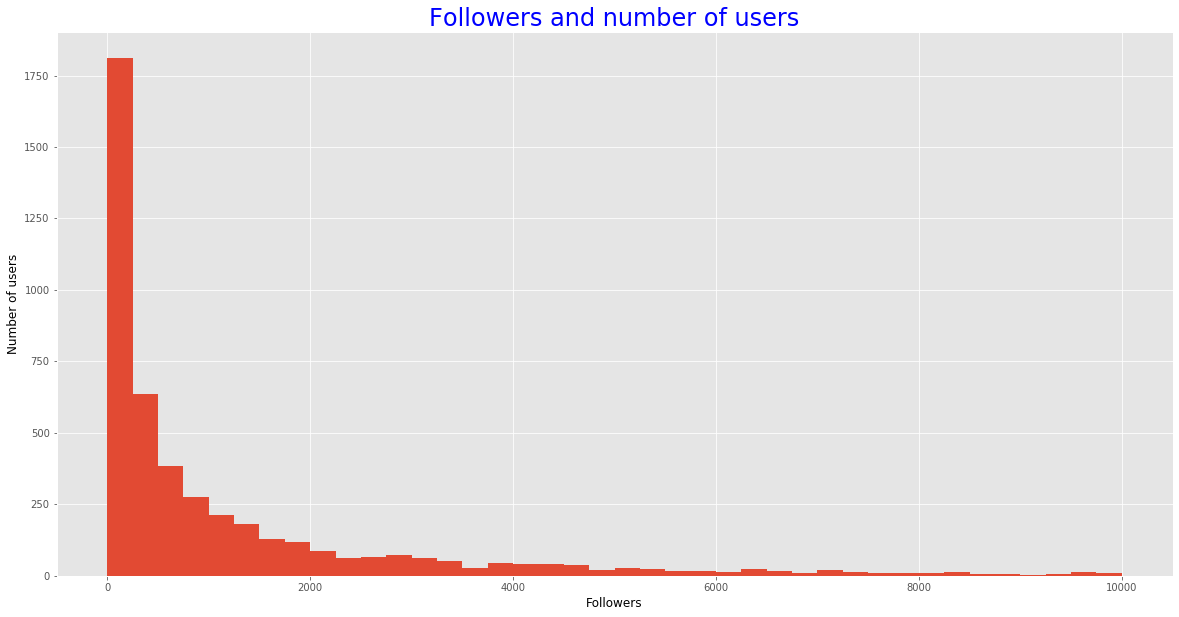

In [24]:
fig, ax = plt.subplots(figsize=(20,10))
maxi = 10000
tweets[['user_id','followers']].drop_duplicates()['followers'].plot.hist(bins=40, range=(0,maxi))
plt.ylabel("Number of users", color='black')
plt.xlabel("Followers", color='black')
plt.title("Followers and number of users", color='blue', fontsize=24)
plt.show()

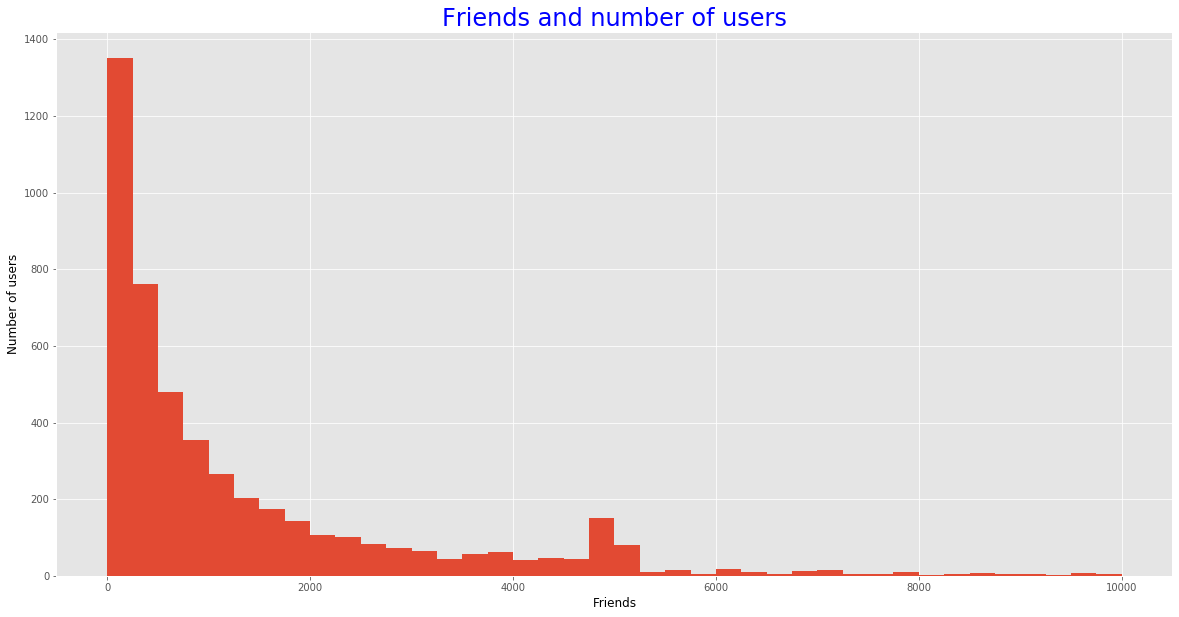

In [25]:
fig, ax = plt.subplots(figsize=(20,10))
maxi = 10000
tweets[['user_id','friends']].drop_duplicates()['friends'].plot.hist(bins=40, range=(0,maxi))
plt.ylabel("Number of users", color='black')
plt.xlabel("Friends", color='black')
plt.title("Friends and number of users", color='blue', fontsize=24)
plt.show()

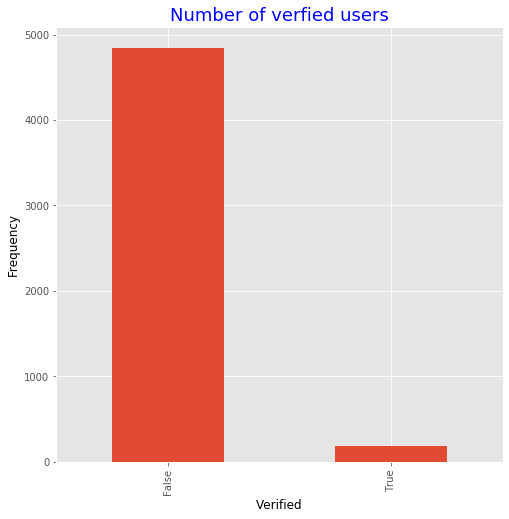

In [26]:
verified_unique = tweets[['user_id','verified']].drop_duplicates()['verified']

fig, ax = plt.subplots(figsize=(8,8))
verified_unique.value_counts().plot(ax=ax, kind='bar')
plt.ylabel("Frequency", color='black')
plt.xlabel("Verified", color='black')
plt.title("Number of verfied users", color='blue', fontsize=18)
plt.show()

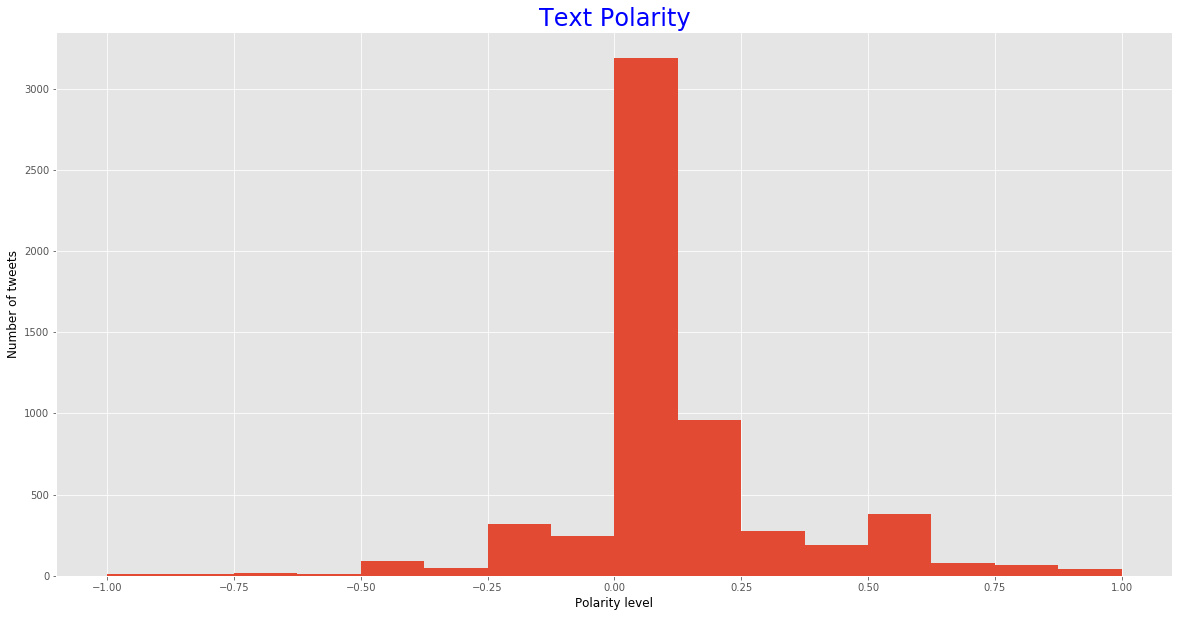

In [27]:
fig, ax = plt.subplots(figsize=(20,10))
maxi = 10000
tweets['text_polarity'].plot.hist(bins=16, range=(-1,1))
plt.ylabel("Number of tweets", color='black')
plt.xlabel("Polarity level", color='black')
plt.title("Text Polarity", color='blue', fontsize=24)
plt.show()

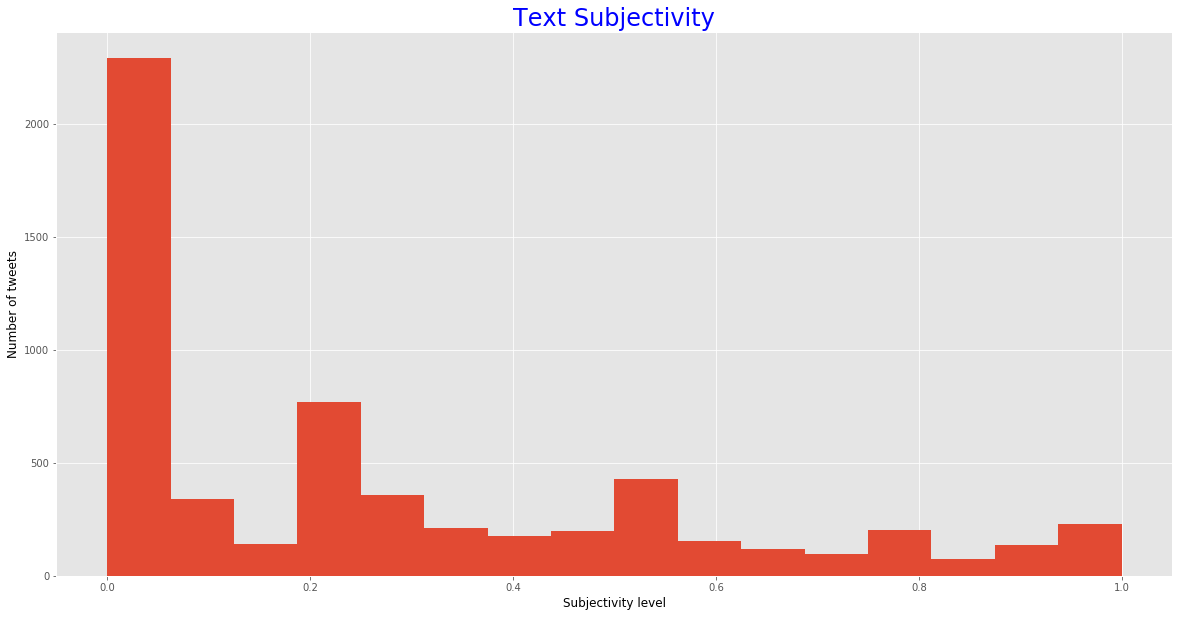

In [28]:
fig, ax = plt.subplots(figsize=(20,10))
maxi = 10000
tweets['text_subjectivity'].plot.hist(bins=16, range=(0,1))
plt.ylabel("Number of tweets", color='black')
plt.xlabel("Subjectivity level", color='black')
plt.title("Text Subjectivity", color='blue', fontsize=24)
plt.show()

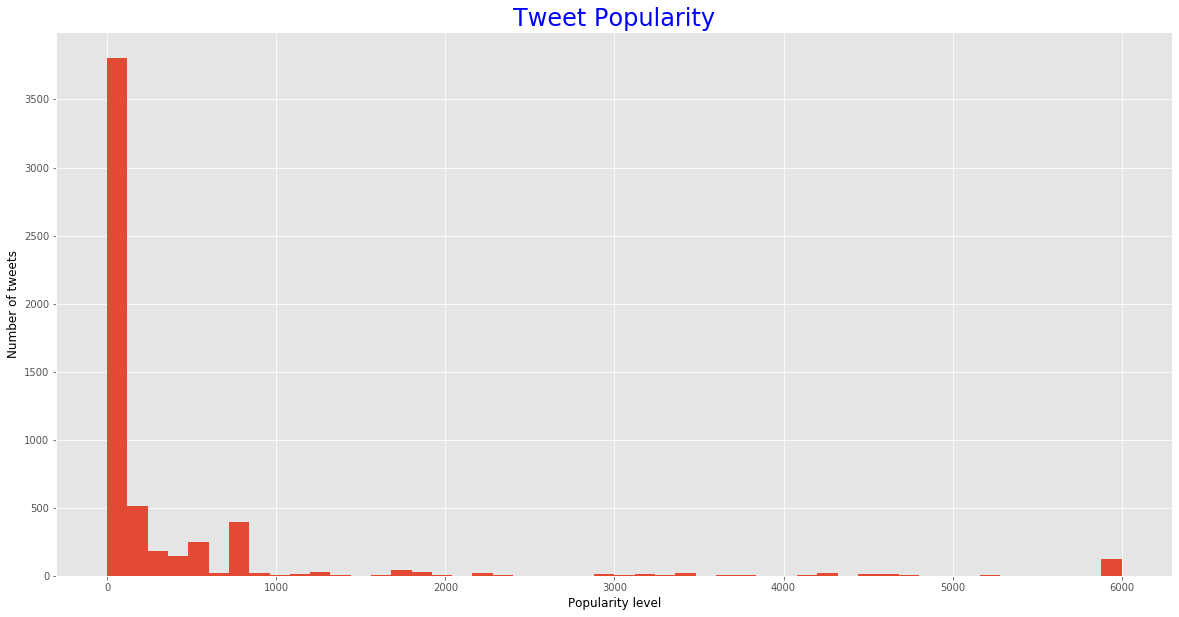

In [29]:
fig, ax = plt.subplots(figsize=(20,10))
maxi = 6000
tweets['popularity'].plot.hist(bins=50, range=(0,maxi))
plt.ylabel("Number of tweets", color='black')
plt.xlabel("Popularity level", color='black')
plt.title("Tweet Popularity", color='blue', fontsize=24)
plt.show()